In [277]:
import paddle

In [278]:
import numpy as np
import os
from PIL import Image
size = (960,960)
# image = Image.open('/home/luffy/final_menu/IMG_4426.JPG')
# print(image.size)
 
from PIL import Image, ExifTags
 
img_file = '/home/luffy/final_menu/IMG_4426.JPG'
image = Image.open(img_file)
 
 
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break
exif = dict(image._getexif().items())
 
if exif[orientation] == 3:
    image = image.rotate(180, expand=True)
elif exif[orientation] == 6:
    image = image.rotate(270, expand=True)
elif exif[orientation] == 8:
    image = image.rotate(90, expand=True)
image = image.resize(size)
image.save('resize.jpg')
print(image.size)

(640, 640)


In [279]:

'''width, height = image.size
#放大尺寸
scale_factor = 1.2

new_width = int(width * scale_factor)
new_height = int(height * scale_factor)

# 進行放大
resized_image = image.resize((new_width, new_height), Image.LANCZOS)

# 保存圖片
output_path = 'resize.jpg'  # 路徑
resized_image.save(output_path)

print(f"放大的圖片已經保存到 {output_path}")'''

'width, height = image.size\n#放大尺寸\nscale_factor = 1.2\n\nnew_width = int(width * scale_factor)\nnew_height = int(height * scale_factor)\n\n# 進行放大\nresized_image = image.resize((new_width, new_height), Image.LANCZOS)\n\n# 保存圖片\noutput_path = \'resize.jpg\'  # 路徑\nresized_image.save(output_path)\n\nprint(f"放大的圖片已經保存到 {output_path}")'

In [280]:
from paddleocr import PaddleOCR, draw_ocr

# Paddleocr目前支持的多语言语种可以通过修改lang参数进行切换
# 例如`ch`, `en`, `fr`, `german`, `korean`, `japan`
model_1 = '/home/luffy/PaddleOCR/pretrain_models/iter_30/iter_epoch_30.pdparams'
model_2 = '/home/luffy/final_menu/iter_epoch_87.pdparams'
model_3 = '/home/luffy/final_menu/v4_best_rec'
ocr = PaddleOCR(use_angle_cls=True,rec_model='/home/luffy/final_menu/best_accuracy.pdparams')  # need to run only once to download and load model into memory
img_path = '/home/luffy/final_menu/resize.jpg'
result = ocr.ocr(img_path, cls=True)
#for idx in range(len(result)):
#    res = result[idx]
 #   for line in res:
#        print(line)

from PIL import Image
result = result[0]
image = Image.open(img_path)
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/home/luffy/final_menu/ppocr_img/fonts/chinese_cht.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result_2.jpg')
result


[2024/06/18 12:57:47] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/luffy/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/luffy/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_

[[[[279.0, 33.0], [307.0, 33.0], [307.0, 55.0], [279.0, 55.0]],
  ('黄', 0.9715798497200012)],
 [[[382.0, 34.0], [413.0, 34.0], [413.0, 59.0], [382.0, 59.0]],
  ('記', 0.8332074284553528)],
 [[[305.0, 67.0], [384.0, 69.0], [384.0, 84.0], [305.0, 82.0]],
  ('古早包子', 0.945941150188446)],
 [[[215.0, 124.0], [231.0, 124.0], [231.0, 137.0], [215.0, 137.0]],
  ('頭', 0.7476927638053894)],
 [[[505.0, 124.0], [520.0, 124.0], [520.0, 139.0], [505.0, 139.0]],
  ('料', 0.8408158421516418)],
 [[[84.0, 156.0], [165.0, 156.0], [165.0, 173.0], [84.0, 173.0]],
  ('原味頭', 0.9568490386009216)],
 [[[256.0, 156.0], [304.0, 156.0], [304.0, 174.0], [256.0, 174.0]],
  ('12工', 0.8735334277153015)],
 [[[377.0, 157.0], [420.0, 157.0], [420.0, 175.0], [377.0, 175.0]],
  ('红茶', 0.8651564717292786)],
 [[[520.0, 157.0], [567.0, 157.0], [567.0, 175.0], [520.0, 175.0]],
  ('小10', 0.9968106746673584)],
 [[[83.0, 176.0], [165.0, 176.0], [165.0, 193.0], [83.0, 193.0]],
  ('红糖鳗頭', 0.7374387979507446)],
 [[[257.0, 176.0], [279.

In [281]:
import numpy as np
class BOX:
    def __init__(self,box):
        self.x = np.mean([cor[0] for cor in box] )
        self.y = np.mean([cor[1] for cor in box] )
        self.x_min = 0.5*(box[0][0]+box[3][0])
        self.x_max = 0.5*(box[1][0]+box[2][0])
        self.y_min = 0.5*(box[0][1]+box[1][1])
        self.y_max = 0.5*(box[2][1]+box[3][1])

In [282]:
def create_dict(data):
    dict = {'餐點':data[0],'價格':data[1]}
    return dict

In [283]:
class select:
    def __init__(self,x,y,num):
        self.x = x
        self.y = y
        self.num = num

In [284]:
import ultralytics


0: 640x640 2 ones, 1 three, 2 twos, 2.1ms
Speed: 0.6ms preprocess, 2.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


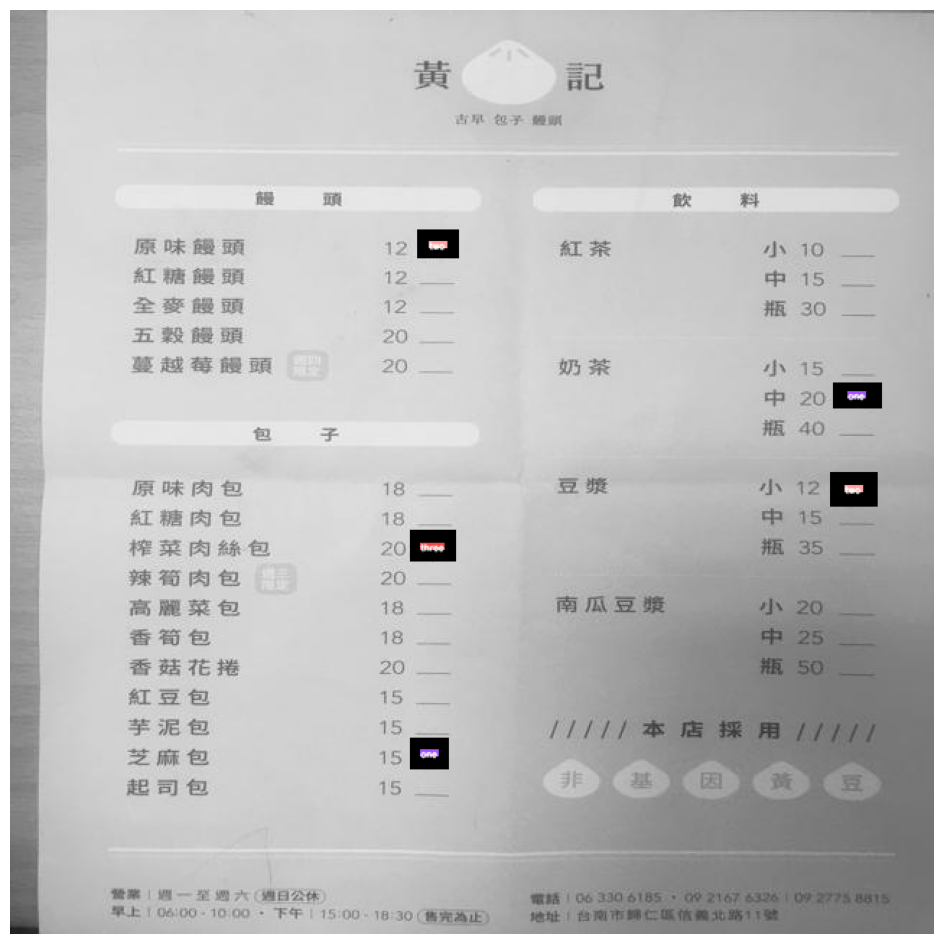

[0.0, 1.0, 2.0, 2.0, 0.0]


In [285]:
from det_num import det_num_of_menu
num_list, box_two_point_list = det_num_of_menu(image_path=img_path)
print(num_list)
sel_list = []           
for i,box_two_point in enumerate(box_two_point_list):
    sel_pos = (0.5*(box_two_point[0]+box_two_point[2]),0.5*(box_two_point[1]+box_two_point[3]))
    if num_list[i]==0:
        sel_num = 1
    elif num_list[i]==1:
        sel_num = 3
    elif num_list[i]==2:
        sel_num = 2
    elif num_list[i]==3:
        sel_num = 4
    else:
        sel_num = 5
    sel = select(sel_pos[0],sel_pos[1],sel_num)
    #保存所有selection
    sel_list.append(sel)
        
    
    


In [286]:
!pip list

DEPRECATION: Loading egg at /home/luffy/anaconda3/envs/paddleOCR/lib/python3.11/site-packages/huggingface_hub-0.23.4-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Package                Version
---------------------- --------------------
anyio                  4.4.0
astor                  0.8.1
asttokens              2.0.5
attrdict               2.0.1
Babel                  2.15.0
bce-python-sdk         0.9.14
beautifulsoup4         4.12.3
blinker                1.8.2
Brotli                 1.0.9
cachetools             5.3.3
certifi                2023.7.22
chardet                4.0.0
charset-normalizer     2.0.4
click                  8.1.7
coloredlogs            15.0.1
comm                   0.2.1
contourpy              1.2.1
cssselect              1.2.0
cssutils               2.11.1
cycler                 0.10.0
Cython          

In [287]:
all_inf = []
price_box_list = []
old_box = BOX([[0,0],[0,0],[0,0],[0,0]])
meal = ''
for inf in result:
    box = inf[0]
    new_box = BOX(box)
    if meal and new_box.y > old_box.y_max:
        #print(meal)
        meal = ''
    info = inf[1][0]
    length = len(info)
    #print(info)
    number = ''
    for i,c in enumerate(info):
        if c.isdigit():
            number += c
            #print(number)
            if i==length-1:
                d = create_dict([meal,number])
                price_box_list.append(new_box)
                all_inf.append(d)
                #print(meal,number)
                meal = ''
        else:
            if number:
                #print(meal,number)
                if len(number)>=4 or number[0]=='0':
                    number = ''
                    meal = ''
                    continue
                price = number
                d = create_dict([meal,number])
                price_box_list.append(old_box)
                all_inf.append(d)
                #print(price)
                meal = ''
                number = ''
            meal += c
    old_box = new_box
all_inf


[{'餐點': '原味頭', '價格': '12'},
 {'餐點': '工红茶小', '價格': '10'},
 {'餐點': '红糖鳗頭', '價格': '12'},
 {'餐點': '中', '價格': '15'},
 {'餐點': '全鳗頭', '價格': '12'},
 {'餐點': '瓶', '價格': '30'},
 {'餐點': '五毂鳗頭', '價格': '20'},
 {'餐點': '蔓越莓饅頭', '價格': '20'},
 {'餐點': '奶茶小', '價格': '15'},
 {'餐點': '中', '價格': '20'},
 {'餐點': '包子瓶', '價格': '40'},
 {'餐點': '原味肉包', '價格': '18'},
 {'餐點': '豆小', '價格': '12'},
 {'餐點': '红糖肉包', '價格': '18'},
 {'餐點': '中', '價格': '15'},
 {'餐點': '榨菜肉絲包', '價格': '20'},
 {'餐點': '下瓶', '價格': '35'},
 {'餐點': '辣简肉包', '價格': '20'},
 {'餐點': '高菜包', '價格': '18'},
 {'餐點': '南瓜豆小', '價格': '20'},
 {'餐點': '香简包', '價格': '18'},
 {'餐點': '中', '價格': '25'},
 {'餐點': '香菇花捲', '價格': '20'},
 {'餐點': '瓶', '價格': '50'},
 {'餐點': '红豆包', '價格': '15'},
 {'餐點': '芋泥包', '價格': '15'},
 {'餐點': '|', '價格': '1'},
 {'餐點': '/|本店探用//', '價格': '1'},
 {'餐點': '芝麻包', '價格': '15'},
 {'餐點': '起司包', '價格': '15'},
 {'餐點': '', '價格': '00216763260927758815'},
 {'餐點': '早上', '價格': '106'},
 {'餐點': '', '價格': '10'},
 {'餐點': '下午|', '價格': '15'},
 {'餐點': '', '價格': '18'},
 {'餐點': ':',

In [288]:
price_box_list[0].y_max

173.0

In [289]:
for sel in sel_list:
    print(sel.x,sel.y,sel.num)

290.7856750488281 514.9699859619141 1
292.888427734375 371.0661926269531 3
584.161376953125 331.979736328125 2
296.42364501953125 162.2561492919922 2
586.9761352539062 266.88104248046875 1


In [290]:
for price_box in price_box_list:
    print(price_box.x,price_box.y)

124.5 164.5
543.5 166.0
268.0 184.5
544.0 186.0
267.0 205.5
543.5 207.0
267.5 226.0
267.5 247.0
543.0 248.5
544.0 268.5
543.0 289.5
266.0 332.0
552.5 330.5
266.5 352.5
541.5 350.5
130.5 373.0
542.5 372.0
266.0 393.5
265.0 414.5
542.0 413.0
265.0 435.0
542.5 434.0
264.5 455.5
542.5 455.0
265.0 476.0
264.5 497.5
264.5 497.5
486.5 498.5
264.5 518.5
264.0 538.0
485.0 615.0
485.0 615.0
485.0 615.0
485.0 615.0
485.0 615.0
485.0 615.0
200.5 626.0


In [291]:
bill = 0
num_list = [0 for _ in range(len(price_box_list))]
for sel in sel_list:
    idx = -1
    dis_min = 9999
    for i, price_box in enumerate(price_box_list):
        if price_box.y_min <= sel.y <= price_box.y_max and sel.x >= price_box.x:
            x_dis = sel.x - price_box.x_max
            if x_dis < dis_min:
                dis_min = x_dis
                print('here')
                idx = i
                
    print(sel.y)
    print(sel.num,idx)
    num_list[idx] = sel.num
    #print('here')
    bill += num_list[idx] * int(all_inf[idx]['價格'])

here
514.9699859619141
1 28
here
371.0661926269531
3 15
here
here
331.979736328125
2 12
here
162.2561492919922
2 0
here
266.88104248046875
1 9


In [292]:
print(len(num_list))
for i,num in enumerate(num_list):
    all_inf[i]['數量'] = num
    if num!=0:
        print(all_inf[i])



37
{'餐點': '原味頭', '價格': '12', '數量': 2}
{'餐點': '中', '價格': '20', '數量': 1}
{'餐點': '豆小', '價格': '12', '數量': 2}
{'餐點': '榨菜肉絲包', '價格': '20', '數量': 3}
{'餐點': '芝麻包', '價格': '15', '數量': 1}


In [293]:
print(bill)

143


In [294]:
all_inf

[{'餐點': '原味頭', '價格': '12', '數量': 2},
 {'餐點': '工红茶小', '價格': '10', '數量': 0},
 {'餐點': '红糖鳗頭', '價格': '12', '數量': 0},
 {'餐點': '中', '價格': '15', '數量': 0},
 {'餐點': '全鳗頭', '價格': '12', '數量': 0},
 {'餐點': '瓶', '價格': '30', '數量': 0},
 {'餐點': '五毂鳗頭', '價格': '20', '數量': 0},
 {'餐點': '蔓越莓饅頭', '價格': '20', '數量': 0},
 {'餐點': '奶茶小', '價格': '15', '數量': 0},
 {'餐點': '中', '價格': '20', '數量': 1},
 {'餐點': '包子瓶', '價格': '40', '數量': 0},
 {'餐點': '原味肉包', '價格': '18', '數量': 0},
 {'餐點': '豆小', '價格': '12', '數量': 2},
 {'餐點': '红糖肉包', '價格': '18', '數量': 0},
 {'餐點': '中', '價格': '15', '數量': 0},
 {'餐點': '榨菜肉絲包', '價格': '20', '數量': 3},
 {'餐點': '下瓶', '價格': '35', '數量': 0},
 {'餐點': '辣简肉包', '價格': '20', '數量': 0},
 {'餐點': '高菜包', '價格': '18', '數量': 0},
 {'餐點': '南瓜豆小', '價格': '20', '數量': 0},
 {'餐點': '香简包', '價格': '18', '數量': 0},
 {'餐點': '中', '價格': '25', '數量': 0},
 {'餐點': '香菇花捲', '價格': '20', '數量': 0},
 {'餐點': '瓶', '價格': '50', '數量': 0},
 {'餐點': '红豆包', '價格': '15', '數量': 0},
 {'餐點': '芋泥包', '價格': '15', '數量': 0},
 {'餐點': '|', '價格': '1', '數量': 0},
 {'餐點'